# Correlations between MOC EOF and NINO3.4

In [1]:
#load packages
import numpy as np
from netCDF4 import Dataset
import cPickle as pickle
import scipy.stats as stats
import scipy.signal as signal
import GaussFilt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',size=16) #set default font size and weight for plots

In [2]:
#unpickle MOC EOFs
with open('MOC_JFM_all_rev.pickle','rb') as fp:
    MOC_jfm = pickle.load(fp)
    MOC_jfm = MOC_jfm[0]

#unpickle SSW central dates
with open('MOC_ANN_all_rev.pickle','rb') as fp:
    MOC_ann = pickle.load(fp)
    MOC_ann = MOC_ann[0]

In [3]:
#unpickle NINO34
with open('NINO34_NDJF.pickle','rb') as fp:
    nino34 = pickle.load(fp)
    nino34 = nino34[0]

In [4]:
   
#unpickle NAO
with open('NAO_DJFM.pickle','rb') as fp:
    nao = pickle.load(fp)
    nao = nao[0]

In [5]:
MOC_jfm.shape

(1100,)

In [6]:
print "JFM: MOC & NINO34"
print "Correlation = ", stats.pearsonr(MOC_jfm,nino34)
print "R-squared = ", 100*np.corrcoef(MOC_jfm,nino34)[0,1]**2, '%'
print ""
print "ANN: MOC & NINO34"
print "Correlation = ", stats.pearsonr(MOC_ann,nino34)
print "R-squared = ", 100*np.corrcoef(MOC_ann,nino34)[0,1]**2, '%'
print ""
print "JFM: MOC & NAO"
print "Correlation = ", stats.pearsonr(MOC_jfm,nao)
print "R-squared = ", 100*np.corrcoef(MOC_jfm,nao)[0,1]**2, '%'
print ""
print "JFM: NINO34 & NAO"
print "Correlation = ", stats.pearsonr(nino34,nao)
print "R-squared = ", 100*np.corrcoef(nino34,nao)[0,1]**2, '%'

JFM: MOC & NINO34
Correlation =  (0.50618137790315021, 1.2567701498077407e-72)
R-squared =  25.6219587336 %

ANN: MOC & NINO34
Correlation =  (0.18897585302488601, 2.6582892028408179e-10)
R-squared =  3.57118730265 %

JFM: MOC & NAO
Correlation =  (-0.41806723915128841, 9.0193818792511336e-48)
R-squared =  17.4780216452 %

JFM: NINO34 & NAO
Correlation =  (-0.3548081134624097, 5.6099330701211194e-34)
R-squared =  12.5888797379 %


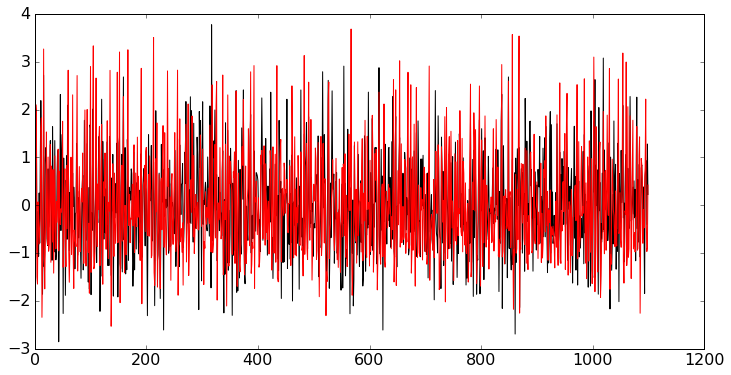

In [7]:
plt.figure(figsize=(12,6))
plt.plot(MOC_jfm,color='k')
plt.plot(nino34,color='r')

In [8]:
#unpickle SSW central dates
with open('ENSO_NDJF_years_rev.pickle','rb') as fp:
    elnino_yrs,lanina_yrs = pickle.load(fp)

#create composite of El Nino/La Nina years
ElNinoyrs = MOC_jfm[np.squeeze(elnino_yrs)]
LaNinayrs = MOC_jfm[np.squeeze(lanina_yrs)]

In [9]:
print elnino_yrs.shape, lanina_yrs.shape

(281, 1) (353, 1)


In [10]:
kernel1 = stats.gaussian_kde(ElNinoyrs)
x1 = np.linspace(2*ElNinoyrs.min(), 2*ElNinoyrs.max(), 1000)
pdf1 = kernel1(x1)

kernel2 = stats.gaussian_kde(LaNinayrs)
x2 = np.linspace(2*LaNinayrs.min(), 2*LaNinayrs.max(), 1000)
pdf2 = kernel2(x2)

In [11]:
ElNinoyrs = np.asarray(ElNinoyrs)
LaNinayrs = np.asarray(LaNinayrs)

In [12]:
ElNinoyrs.shape

(281,)

In [13]:
t = stats.ttest_ind(ElNinoyrs,LaNinayrs)
print t[1]

1.90026647989e-56


In [14]:
#unpickle for plotting
pname = 'MOC_JFM_EOF_plot.pickle'
with open(pname,'rb') as fp:
    xx,yy,moc_pat_anom = pickle.load(fp)

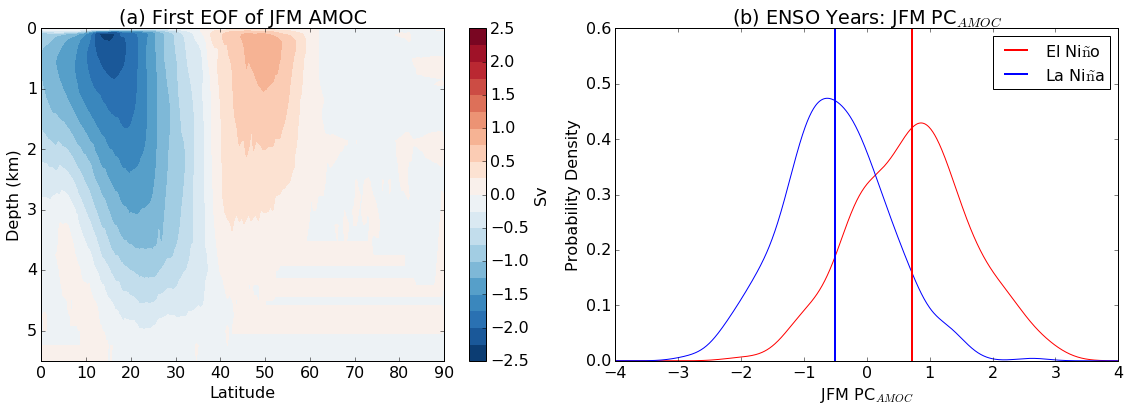

In [15]:
fig = plt.figure(figsize=(16,6))


v = np.linspace(-2.5,2.5,21)
v2 = np.linspace(-2.5,2.5,11)
ax1 = fig.add_subplot(1,2,1)
pc = plt.contourf(xx,yy,moc_pat_anom[:,:,0],v,cmap='RdBu_r')
plt.title('(a) First EOF of JFM AMOC')
plt.xlabel('Latitude',fontsize=16,)
plt.ylabel('Depth (km)',fontsize=16)
plt.gca().invert_yaxis()
#add colorbar
cbar = fig.colorbar(pc)
cbar.set_label('Sv', fontsize=16)
cbar.set_ticks(v2,update_ticks=True)
cbar.ax.tick_params(labelsize=16)
#plt.clim([-5,5])
plt.xlim(0,90)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
plt.plot(x1, pdf1, color='red',linewidth=1) #simple line plot in gray
plt.plot(x2, pdf2, color='blue',linewidth=1) #simple line plot in gray

plt.plot(np.squeeze(np.mean(ElNinoyrs)*np.ones(x1.size)),np.linspace(0,0.6,x1.size),'red',linewidth=2,label=r'El Ni$\~{\rm n}$o')
plt.plot(np.squeeze(np.mean(LaNinayrs)*np.ones(x1.size)),np.linspace(0,0.6,x1.size),'blue',linewidth=2,label=r'La Ni$\~{\rm n}$a')

plt.xlabel('JFM PC$_{AMOC}$')
plt.ylabel('Probability Density')
plt.title('(b) ENSO Years: JFM PC$_{AMOC}$')
plt.legend(loc='upper right',fontsize=16)
x = np.linspace(-4,4,9)
plt.xticks(x)
plt.xlim(-4,4)
plt.tight_layout()

#save figure
plt.savefig('MOC_JFM_EOF_PDFs.eps',bbox_inches='tight')

In [100]:
stats.ks_2samp(ElNinoyrs,LaNinayrs)

Ks_2sampResult(statistic=0.52114564535803931, pvalue=4.2532688805979044e-38)

In [28]:
#unpickle SSW central dates
with open('TAUXavg_JFM_composite_ElNino.pickle','rb') as fp:
    tx_elnino,p1 = pickle.load(fp)
    
#unpickle SSW central dates
with open('TAUXavg_JFM_composite_LaNina.pickle','rb') as fp:
    tx_lanina,p2 = pickle.load(fp)
    
#unpickle SSW central dates
with open('THFavg_JFM_composite_ElNino.pickle','rb') as fp:
    thf_elnino,p3 = pickle.load(fp)
    
#unpickle SSW central dates
with open('THFavg_JFM_composite_LaNina.pickle','rb') as fp:
    thf_lanina,p4 = pickle.load(fp)

In [29]:
R23 = np.round(100*np.corrcoef(tx_elnino,ElNinoyrs)[0,1]**2,1)
R24 = np.round(100*np.corrcoef(tx_lanina,LaNinayrs)[0,1]**2,1)

R25 = np.round(100*np.corrcoef(thf_elnino,ElNinoyrs)[0,1]**2,1)
R26 = np.round(100*np.corrcoef(thf_lanina,LaNinayrs)[0,1]**2,1)

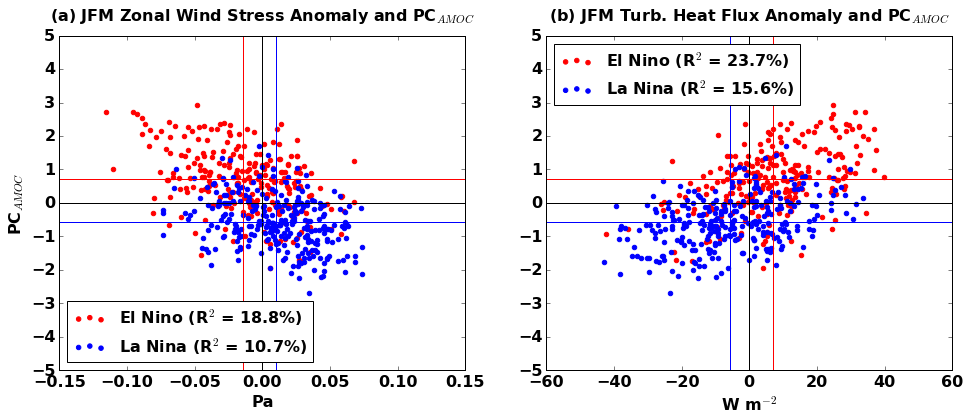

In [61]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(tx_elnino,ElNinoyrs,color='r',label='El Nino (R$^{2}$ = '+ str(R23)+'%)')
plt.scatter(tx_lanina,LaNinayrs,color='b',label='La Nina (R$^{2}$ = '+ str(R24)+'%)')
plt.axvline(0,color='k')
plt.axhline(0,color='k')

plt.axvline(np.mean(tx_elnino),color='r')
plt.axhline(np.mean(ElNinoyrs),color='r')
plt.axvline(np.mean(tx_lanina),color='b')
plt.axhline(np.mean(LaNinayrs),color='b')
plt.ylim(-5,5)
plt.xlim(-0.15,0.15)
x = np.linspace(-0.15,0.15,7)
y = np.linspace(-5,5,11)
plt.xticks(x)
plt.yticks(y)
plt.ylabel('PC$_{AMOC}$',weight='bold')
plt.xlabel('Pa',weight='bold')
plt.title('(a) JFM Zonal Wind Stress Anomaly and PC$_{AMOC}$',size=16,weight='bold',y=1.03)
plt.legend(loc='lower left',fontsize=16)

ax2 = fig.add_subplot(1,2,2)
plt.scatter(thf_elnino,ElNinoyrs,color='r',label='El Nino (R$^{2}$ = '+ str(R25)+'%)')
plt.scatter(thf_lanina,LaNinayrs,color='b',label='La Nina (R$^{2}$ = '+ str(R26)+'%)')
plt.axvline(0,color='k')
plt.axhline(0,color='k')

plt.axvline(np.mean(thf_elnino),color='r')
plt.axhline(np.mean(ElNinoyrs),color='r')
plt.axvline(np.mean(thf_lanina),color='b')
plt.axhline(np.mean(LaNinayrs),color='b')

plt.ylim(-5,5)
plt.yticks(y)
#plt.ylabel('AMOC Index',weight='bold')
plt.xlabel('W m$^{-2}$',weight='bold')
plt.title('(b) JFM Turb. Heat Flux Anomaly and PC$_{AMOC}$',size=16,weight='bold',y=1.03)
plt.legend(loc='upper left',fontsize=16)
#save figure
plt.savefig('Scatter_JFM_TAUX_THF_MOC_ENSO.eps',bbox_inches='tight')

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


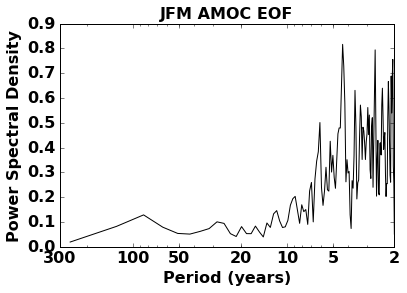

In [89]:
from scipy.signal import welch
f, Pxx_den = signal.welch(MOC_ann)
x = 1/f
plt.semilogx(x,Pxx_den*f,'k')
plt.xlim(2,300)
y = np.asarray([2,5,10,20,50,100,300])
plt.xticks(y,[2,5,10,20,50,100,300])
plt.ylabel('Power Spectral Density',weight='bold')
plt.xlabel('Period (years)',weight='bold')
plt.title('JFM AMOC EOF',weight='bold',fontsize=16)
plt.gca().invert_xaxis()
#save figure
#plt.savefig('MOC_JFM_EOF_power_spectrum.eps',bbox_inches='tight')

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


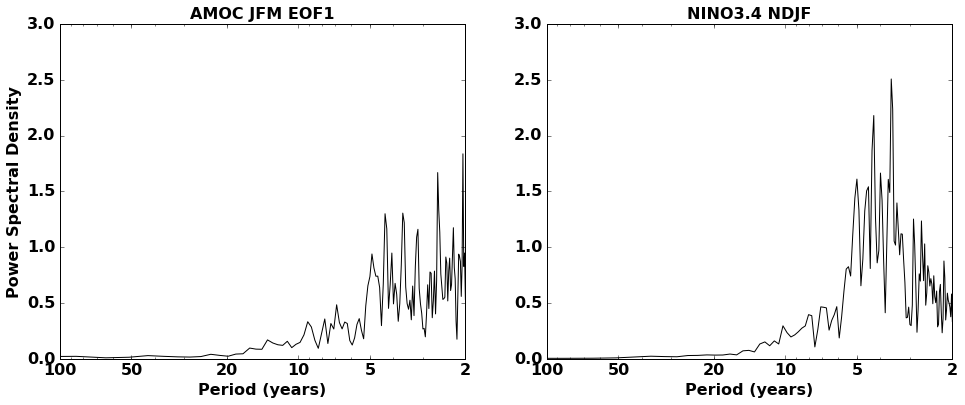

In [90]:
from scipy.signal import welch
f, Pxx_den = signal.welch(MOC_jfm)
f, Pxx_den2 = signal.welch(nino34)
x = 1/f

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
plt.semilogx(x,Pxx_den*f,'k')
plt.xlim(2,100)
plt.ylim(0,3)
y = np.asarray([2,5,10,20,50,100])
plt.xticks(y,[2,5,10,20,50,100])
plt.ylabel('Power Spectral Density',weight='bold')
plt.xlabel('Period (years)',weight='bold')
plt.title('AMOC JFM EOF1',weight='bold',fontsize=16)
plt.gca().invert_xaxis()

ax2 = fig.add_subplot(1,2,2)
plt.semilogx(x,Pxx_den2*f,'k')
plt.xlim(2,100)
plt.ylim(0,3)
y = np.asarray([2,5,10,20,50,100])
plt.xticks(y,[2,5,10,20,50,100])
#plt.ylabel('Power Spectral Density',weight='bold')
plt.xlabel('Period (years)',weight='bold')
plt.title('NINO3.4 NDJF',weight='bold',fontsize=16)
plt.gca().invert_xaxis()
#save figure
plt.savefig('AMOC_JFM_EOF_NINO34_power_spectrum.eps',bbox_inches='tight')

In [81]:
#initialize Gaussian Filter
sigma = 0.7 #years
print 6*sigma
gaussFilter = GaussFilt.GaussFilt(sigma)

4.2


In [82]:
nino34_smooth = np.convolve(nino34,gaussFilter,'valid') #sliding 1window for Gaussian smoothing

In [83]:
MOC_smooth = np.convolve(MOC_jfm,gaussFilter,'valid') #sliding window for Gaussian smoothing

In [84]:
print "JFM:"
print "Correlation = ", np.corrcoef(MOC_smooth,nino34_smooth)[0,1]
print "R-squared = ", 100*np.corrcoef(MOC_smooth,nino34_smooth)[0,1]**2, '%'

JFM:
Correlation =  0.541994562673
R-squared =  29.3758105967 %


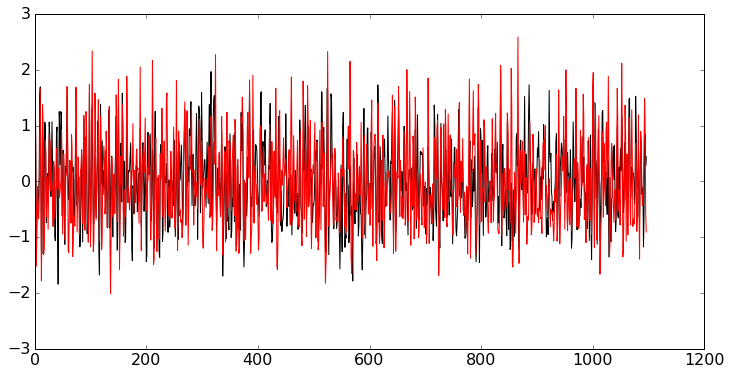

In [85]:
plt.figure(figsize=(12,6))
plt.plot(MOC_smooth,color='k')
plt.plot(nino34_smooth,color='r')